## <center> Method of lines <center>

The numerical method of lines is a technique for solving partial differential equations by discretizing in all but one dimension and then integrating the semi-discrete problem as a system of ODEs or DAEs. A significant advantage of the method is that it allows the solution to take advantage of the sophisticated general-purpose methods and software that have been developed for numerically integrating ODEs and DAEs. For the PDEs to which the method of lines is applicable, the method typically proves to be quite efficient.

It is necessary that the PDE problem be well posed as an initial value (Cauchy) problem in at least one dimension, since the ODE and DAE integrators used are initial value problem solvers. This rules out purely elliptic equations such as Laplace's equation but leaves a large class of evolution equations that can be solved quite efficiently.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**Ex:**
$$  \frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2} - \beta(T-T_a)$$

where $\alpha = 0.025$, $\beta = 0.1$, and the boundary values are $T(0,t) = 100°C$ and $T(L,t) = 25$  with $L = 1$

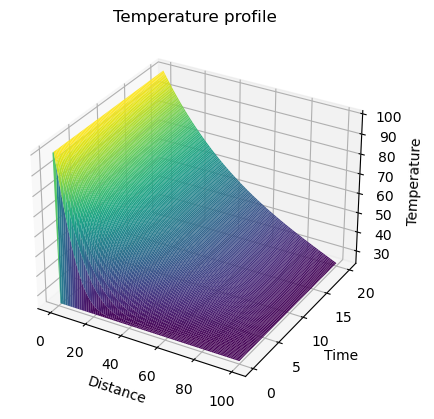

In [2]:
# Parameters
Ta = 25
alpha = 0.025
beta = 0.1
L = 1
N = 100


def fun(y, t, N):
    
    T = np.zeros(N+1)
    T[0] = 100
    T[1:N] = y
    T[N] = Ta

    dx = L/N
        
    dTdt = np.zeros(N+1)
    for i in range(1, N):
        dTdt[i] = alpha / dx**2 * (T[i+1] - 2*T[i] + T[i-1]) - beta * (T[i] - Ta)

    fval = dTdt[1:N]
    return fval

# Spatial organization
x_vec = np.linspace(0,100,(N+1))

# Time organization
t_vec = np.linspace(0,20,N)

X, Y = np.meshgrid(x_vec, t_vec)

# Solution
T = np.ones(N+1,)*Ta
T[0] = 100
y0 = T[1:N]

sol = odeint(fun, y0, t_vec, args=(N,))

y = np.zeros((t_vec.size, x_vec.size))
y.shape

y[:,0] = 100
y[:,1:N] = sol
y[:, N] = 25

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Temperature profile')
ax.set_xlabel("Distance")
ax.set_ylabel("Time")
ax.set_zlabel("Temperature");

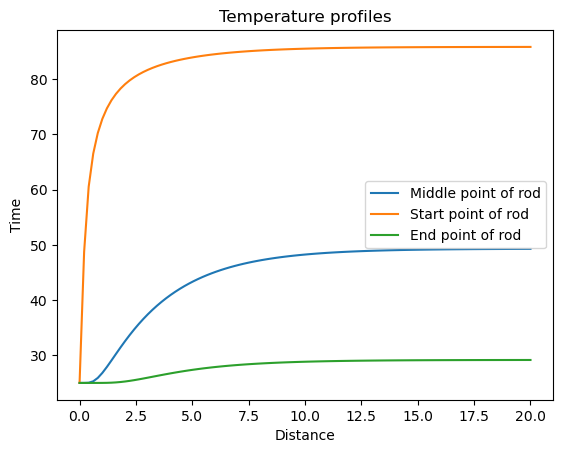

In [3]:
plt.plot(t_vec, y[:, int(N/2)], label="Middle point of rod")
plt.plot(t_vec, y[:, int(N/10)], label="Start point of rod")
plt.plot(t_vec, y[:, int(9*N/10)], label="End point of rod")
plt.title("Temperature profiles")
plt.xlabel("Distance")
plt.ylabel("Time")
plt.legend(loc="best");